In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 13. 특잇값 분해: 고윳값 분해의 다음 단계  

SVD의 목적 : 하나의 행렬을 왼쪽 특이벡터($U$), 특잇값($\Sigma$), 오른쪽 특이벡터($V$)라고 하는 세 행렬의 곱으로 분해하는 것입니다.  

$A=U\Sigma V^{T}$  

SVD는 고윳값 분해를 정방이 아닌 행렬까지 확대해서 일반화한 것

고윳값 분해  
$A = V\Lambda V^{-1}$  

<img src='images/fig_13_01.png' width = 600>  

<img src='images/fig_13_02.png' width = 300>  

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-20-%ED%8A%B9%EC%9D%B4%EA%B0%92-%EB%B6%84%ED%95%B4Singular-Value-Decomposition  
  
<img src='images/fig_13_03.png' width = 600>  

SVD의 기하학적 의미를 조금 더 직관적인 질문을 통해 이해해보겠습니다.  

"직교하는 벡터 집합 V = (v₁, v₂, ...)에 대하여 선형 변환 후에도 그 크기는 변하지만 여전히 직교하게 만드는 그 직교 벡터 집합은 무엇이고, 변경 후의 벡터 집합은 무엇인가?"라는 질문을 보시죠.  

A = U ∑ Vt 에서 양변에 V를 내적해주면, A V = U ∑ 가 됩니다. U와 V에 속한 벡터는 서로 직교하는 성질을 가진다고 했습니다. 따라서 서로 직교하는 벡터로 구성된 행렬 V에 선형 변환 A를 해준 뒤에도 서로 직교하는 벡터로 구성된 행렬 U가 만들어집니다. 다만 그 크기가 ∑만큼 차이가 있습니다.  

직교하는 벡터 집합 V에 대하여 선형 변환 A 후에도 그 크기는 ∑만큼 변하지만 여전히 직교하는 벡터 집합 U를 만듭니다. 

## 13.2 파이썬에서 SVD

U
 [[-0.4913985   0.17998239 -0.52321984  0.16147055 -0.58399341 -0.29198255]
 [ 0.32346925  0.28826361 -0.13173706 -0.74415112 -0.4078334   0.27354729]
 [-0.0945983  -0.20940908  0.74302324 -0.11319402 -0.50025086 -0.36338912]
 [ 0.04835621 -0.90631756 -0.28916482 -0.09343284 -0.1942172   0.2149043 ]
 [-0.76166103 -0.06538343  0.08689748 -0.52645816  0.34816533  0.09833118]
 [-0.24996094  0.12235915  0.25619396  0.34851916 -0.2888482   0.80747355]]
S
 [[4.27927633 0.         0.         0.        ]
 [0.         2.03210289 0.         0.        ]
 [0.         0.         1.65256872 0.        ]
 [0.         0.         0.         1.13513429]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Vt
 [[ 0.56898655  0.37946634  0.19500036 -0.7030181 ]
 [ 0.28066107 -0.89858703 -0.15336613 -0.30041561]
 [ 0.77214811  0.05682382 -0.13225605  0.61892381]
 [-0.03565044  0.21287952 -0.95966766 -0.18013697]]


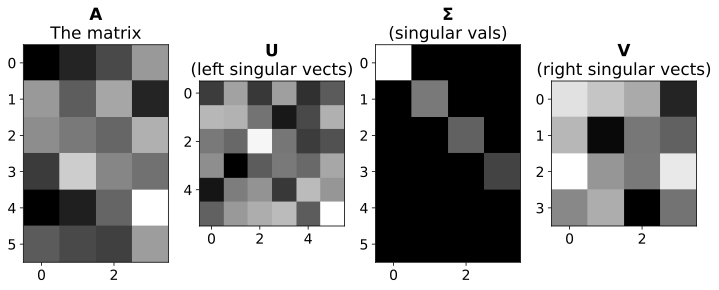

In [12]:
A = np.random.randn(6,4)

# its SVD
U,s,Vt = np.linalg.svd(A)

# create Sigma from sigma's
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

print('U\n',U)
print('S\n',S)
print('Vt\n',Vt)


# show the matrices
_,axs = plt.subplots(1,4,figsize=(10,6))

axs[0].imshow(A,cmap='gray',aspect='equal')
axs[0].set_title('$\mathbf{A}$\nThe matrix')

axs[1].imshow(U,cmap='gray',aspect='equal')
axs[1].set_title('$\mathbf{U}$\n(left singular vects)')

axs[2].imshow(S,cmap='gray',aspect='equal')
axs[2].set_title('$\mathbf{\Sigma}$\n(singular vals)')

axs[3].imshow(Vt,cmap='gray',aspect='equal')
axs[3].set_title('$\mathbf{V}$\n(right singular vects)')

plt.tight_layout()
plt.savefig('Figure_13_02.png',dpi=300)
plt.show()

## 13.4 EIG로부터 SVD

$A=U\Sigma V^{T}$  

U 구하기

$AA^{T} = (U\Sigma V^{T})(U\Sigma V^{T})^{T}$  
    $ = U\Sigma V^{T}V\Sigma U^{T}$  
    $ = U\Sigma^{2} U^{T}$  

V 구하기

$A^{T}A = (U\Sigma V^{T})^{T}(U\Sigma V^{T})$  
    $ = V\Sigma U^{T}U\Sigma V^{T}$  
    $ = V\Sigma^{2} V^{T}$  

### 13.4.1 $A^{T}A$의 SVD

왼쪽과 오른쪽의 특이벡터는 동일합니다.  
$A^{T}A = S = U\Sigma V^{T} = V\Sigma U^{T} = U\Sigma U^{T} = V\Sigma V^{T} $  

# Symmetric matrix

In [16]:
A = np.random.randn(5,5)
A = A.T@A

# extract eigenvalues and singular values
eigvals = np.linalg.eig(A)[0]
sinvals = np.linalg.svd(A)[1]

# they're the same!
print(np.sort(eigvals))
print(np.sort(sinvals))

[ 0.18139058  2.92666002  6.33314222 11.33773144 13.4858577 ]
[ 0.18139058  2.92666002  6.33314222 11.33773144 13.4858577 ]


# Exercise 1

대칭행렬의 경우 특잇값과 고유값이 같다  
특이벡터와 고유벡터는 어떨까?  


고윳값 분해  
$A = V\Lambda V^{-1}$  
SVD  
$A=U\Sigma V^{T}$  

In [23]:
# create a symmetric matrix
A = np.random.randn(5,5)
A = A.T@A
# A = A+A.T # uncomment this line to repeat for A+A'

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# sorting them helps the comparison!
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]



# SVD
U,s,Vt = np.linalg.svd(A)

# compare the eigenvalues and singular values
print('Eigenvalues and singular values:')
print(np.vstack((evals,s)).T)

# now compare the left and right singular vectors
print(f'\nLeft-Right singular vectors (should be zeros)')
print(np.round(U-Vt.T,10)) # remember to compare V not V^T!

# then compare singular vectors with eigenvectors
print(f'\nSingular vectors - eigenvectors (should be zeros)')
print(np.round(U-evecs,10)) # subtract and 
print(' ')                  
print(np.round(U+evecs,10)) # add for sign indeterminancy


Eigenvalues and singular values:
[[16.65057384 16.65057384]
 [11.00998142 11.00998142]
 [ 7.61445655  7.61445655]
 [ 4.60558181  4.60558181]
 [ 3.92710064  3.92710064]]

Left-Right singular vectors (should be zeros)
[[ 0. -0.  0. -0. -0.]
 [-0.  0.  0. -0.  0.]
 [-0. -0.  0.  0. -0.]
 [-0.  0. -0.  0. -0.]
 [-0.  0.  0. -0.  0.]]

Singular vectors - eigenvectors (should be zeros)
[[ 0.          0.73610693  0.          0.55969586  0.88233815]
 [-0.          0.88399212  0.         -0.94659346 -0.6649137 ]
 [-0.         -0.02051876 -0.          0.00234064  1.52209639]
 [-0.         -0.31325145 -0.          1.5699686  -0.66373696]
 [-0.         -1.60566405 -0.         -0.57087168  0.14847551]]
 
[[-0.96772184  0.         -1.1957763   0.         -0.        ]
 [-1.23011249 -0.          0.60599652 -0.          0.        ]
 [-0.20853901 -0.          1.28035447  0.          0.        ]
 [-0.74979186 -0.          0.6590429  -0.         -0.        ]
 [-0.9719369   0.         -0.35950266  0.      

# Exercise 2

'경제형' SVD로 변환

<img src='images/fig_13_04.png' width = 600>   

In [42]:
np.zeros([4,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [44]:
# sizes (try tall and wide)
m = 10
n = 4

# random matrix and its economy (aka reduced) SVD
A = np.random.randn(m,n)
U,s,Vt = np.linalg.svd(A,full_matrices=False)

# create Sigma from sigma's
S = np.zeros([len(s),len(s)])
np.fill_diagonal(S,s)

# print sizes
print(f'Size of A:  {A.shape}')
print(A)
print(f'Size of U:  {U.shape}')
print(U)
print(f'Size of s:  {s.shape}')
print(s)
print(f"Size of V': {Vt.shape}")
print(Vt)

Size of A:  (10, 4)
[[ 0.15889638  1.04690832 -0.56136459  1.14838648]
 [-0.02436181  0.90601783 -0.5484741  -1.0080127 ]
 [-0.59935488 -0.14382547  1.56401476  0.56218931]
 [ 0.84451036  0.71391292  0.2751643   0.36376952]
 [-2.15852166  1.13619257  0.58884975  0.3638558 ]
 [ 0.01843775  1.12957105 -1.31268434 -0.88942419]
 [ 0.09970505  1.09182698  0.40826505 -1.02548105]
 [ 1.30706632 -0.58366473  0.81160707 -1.90079035]
 [-0.60585401 -1.11264517  1.76862099 -1.87588228]
 [-0.62669766  2.03390583 -1.2455256   0.66202357]]
Size of U:  (10, 4)
[[ 0.33282563  0.01020633 -0.11966086 -0.31345353]
 [ 0.07546526 -0.2962475   0.35573182  0.04499936]
 [-0.11941767  0.46953784  0.05524971 -0.41506836]
 [ 0.07136604 -0.10299089 -0.08017189 -0.63623045]
 [ 0.21060661  0.52329972  0.54976021  0.04952183]
 [ 0.2090555  -0.41971987  0.31595043  0.22938992]
 [-0.02089116 -0.18057061  0.43132732 -0.40511655]
 [-0.44350422 -0.41016384  0.12380956 -0.29235002]
 [-0.55091325  0.15677593  0.41994202  0.

In [46]:
A - U@S@Vt

array([[-4.71844785e-16, -2.22044605e-16,  5.55111512e-16,
        -4.44089210e-16],
       [ 3.26128013e-16, -1.44328993e-15,  1.55431223e-15,
         6.66133815e-16],
       [ 2.22044605e-16, -1.11022302e-16, -2.22044605e-15,
         2.22044605e-16],
       [-4.44089210e-16, -4.44089210e-16, -7.21644966e-16,
        -1.66533454e-16],
       [ 8.88178420e-16, -6.66133815e-16, -1.99840144e-15,
        -1.11022302e-16],
       [ 2.15105711e-16, -8.88178420e-16,  1.77635684e-15,
         5.55111512e-16],
       [ 1.80411242e-16, -1.11022302e-15, -7.77156117e-16,
         4.44089210e-16],
       [-4.44089210e-16, -5.55111512e-16, -1.11022302e-16,
         6.66133815e-16],
       [ 5.55111512e-16, -4.44089210e-16, -1.55431223e-15,
         4.44089210e-16],
       [ 4.44089210e-16, -1.33226763e-15,  8.88178420e-16,
        -2.22044605e-16]])

# Exercise 3

직교행렬은 회전하지만 크기를 조정하지 않는다  
|Uw|=|w|를 증명

In [47]:
# The proof that |Uw|=|w| comes from expanding the vector magnitude to the dot product:
# |Uw|^2 = (Uw)'(Uw) = w'U'U'w = w'Iw = w'w = |w|^2


# empirical demonstration:
U,s,Vt = np.linalg.svd(np.random.randn(5,5))
w = np.random.randn(5,1)

# print out the norms
print( np.linalg.norm(U@w) )
print( np.linalg.norm(  w) )

1.3121073815101096
1.3121073815101099


# Exercise 4

행렬의 조건수는 가장 큰 값과 가장 작은 특잇값의 비율로 정의

$U\Sigma V^{T}$의 경험적 조건수가 지정한 수와 동일한지 확인

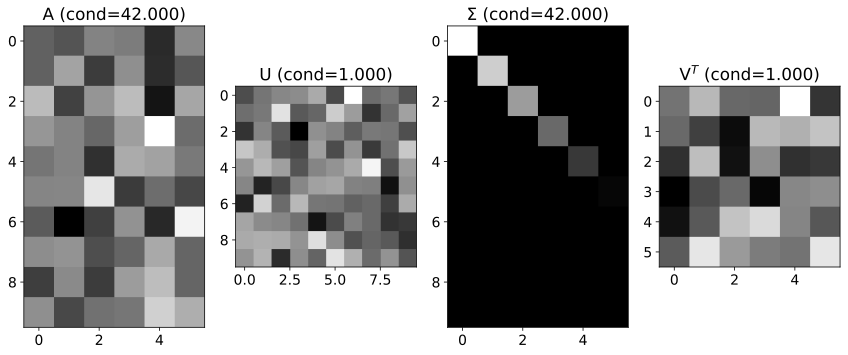

In [55]:
# create a tall matrix with specified condition number
m = 10
n = 6

condnum = 42

# create U and V from random numbers
U,_  = np.linalg.qr( np.random.randn(m,m) )
Vt,_ = np.linalg.qr( np.random.randn(n,n) )

# create singular values vector
s = np.linspace(condnum,1,np.min((m,n)))

# convert into a matrix
S = np.zeros((m,n))
np.fill_diagonal(S,s)

# create matrix
A = U@S@Vt

# and show in a plot
_,axs = plt.subplots(1,4,figsize=(12,6))

axs[0].imshow(A, aspect='equal', cmap='gray')
axs[0].set_title(f'A (cond={np.linalg.cond(A):.3f})')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title(f'U (cond={np.linalg.cond(U):.3f})')

axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title(f'$\Sigma$ (cond={np.linalg.cond(S):.3f})')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title(f'V$^T$ (cond={np.linalg.cond(Vt):.3f})')


plt.tight_layout()
plt.savefig('Figure_13_04.png',dpi=300)
plt.show()

# Exercise 5

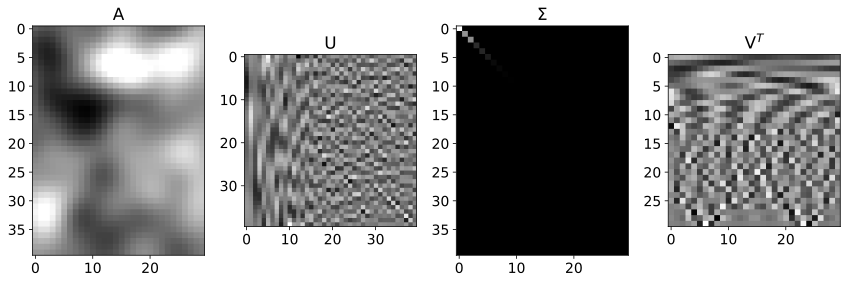

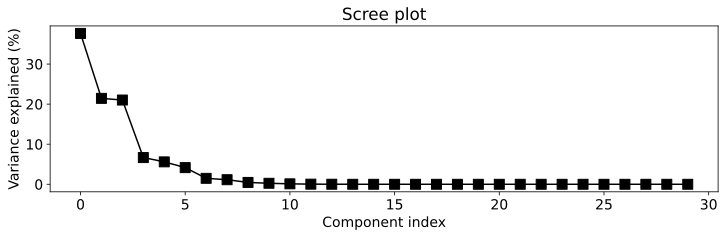

In [70]:
# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )


# now for the matrix
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n),g2d,mode='same')


# SVD and create Sigma
U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)


# visualize the matrices

# and show in a plot
_,axs = plt.subplots(1,4,figsize=(12,6))

axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')

axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('$\Sigma$')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('V$^T$')


plt.tight_layout()
plt.savefig('Figure_13_05a.png',dpi=300)
plt.show()


# and show the scree plot
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
plt.savefig('Figure_13_05b.png',dpi=300)
plt.show()

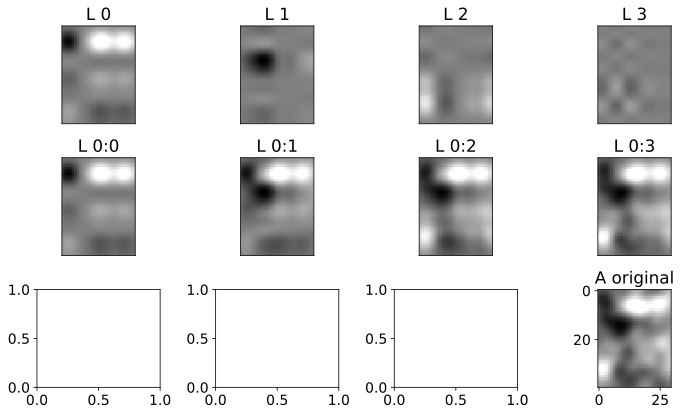

: 

In [73]:
## now show the first N "layers" separately and summed

numLayers = 4
rank1mats = np.zeros((numLayers,m,n))


# setup the figure
_,axs = plt.subplots(3,numLayers,figsize=(10,6))

# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i]
    
    # show this layer
    axs[0,i].imshow(rank1mats[i,:,:],cmap='gray', vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

    # show the cumulative sum of layers
    axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray', vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

axs[2,3].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[2,3].set_title(f'A original')

plt.tight_layout()
plt.savefig('Figure_13_05c.png',dpi=300)
plt.show()

# Exercise 6

MP 의사역행렬 구현

In [58]:
# singular matrix
A = np.random.randn(5,3) @ np.random.randn(3,5)

# its SVD
U,s,Vt = np.linalg.svd(A)

# define a threshold (tolerance) for "zero-valued" singular values
# I thought of using eps scaled by the size of A. Numpy fixed this to 10^-15, 
# which means it is not adapted to different computer precisions.
tol = np.finfo(float).eps * np.max(A.shape)

# invert the supra-threshhold sigma's
sInv = np.zeros_like(s)
sInv[s>tol] = 1/s[s>tol]

# reconstruct
S = np.zeros_like(A)
np.fill_diagonal(S,sInv)
Apinv = Vt.T @ S @ U.T

# compare to pinv()
ApinvNp = np.linalg.pinv(A)

print(np.round( ApinvNp - Apinv ,5))

[[-0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.]
 [-0. -0.  0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [66]:
# check the source code for pinv
# np.linalg.pinv

# Exercise 7

In [59]:
# left-inverse
A = np.random.randn(6,4)

# explicit left inverse
Linv = np.linalg.inv(A.T@A)@A.T

# pinv
Apinv = np.linalg.pinv(A)

# compare
print(np.round( Linv - Apinv ,5))

[[ 0.  0.  0. -0.  0.  0.]
 [-0.  0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0. -0.  0.]]


In [60]:
# right-inverse
A = np.random.randn(4,6)

# explicit right inverse
Rinv = A.T@np.linalg.inv(A@A.T)

# pinv
Apinv = np.linalg.pinv(A)

# compare
print(np.round( Rinv - Apinv ,5))

[[-0.  0. -0. -0.]
 [ 0. -0.  0.  0.]
 [ 0. -0.  0.  0.]
 [-0.  0. -0. -0.]
 [-0.  0. -0. -0.]
 [ 0. -0.  0.  0.]]


# Exercise 8

In [61]:
# the matrix (from chapter 11)
M = np.array([ [-1,1],
               [-1,2] ])

# its eigendecomposition
evals,evecs = np.linalg.eig(M)
l = evals[1]     # extract lambda1 for convenience
v = evecs[:,[1]] # extract v1 for convenience

LHS = M@v
RHS = l*v

# print out the two sides (as row vectors for visual convenience)
print(LHS.T)
print(RHS.T)

[[-0.57735027 -1.51152263]]
[[-0.57735027 -1.51152263]]


In [62]:
# pinv(v)
vPinv = np.linalg.pinv(v)

# check
vPinv@v

array([[1.]])

In [63]:
# first equation
LHS = vPinv @ M @ v
RHS = l * vPinv @ v

# these results are scalars (quadratic form)
print(LHS)
print(RHS)

[[1.61803399]]
[[1.61803399]]


In [64]:
# second equation
LHS = M @ v @ vPinv
RHS = l * v @ vPinv

# these results are matrices
print(LHS), print(' ')
print(RHS)

[[0.20601133 0.53934466]
 [0.53934466 1.41202266]]
 
[[0.20601133 0.53934466]
 [0.53934466 1.41202266]]
